## Estudio de la obesidad en Reido unido

### Los datos han sido obtenidos de la pagina:
### http://data.gov.uk/dataset/statistics_on_obesity_physical_activity_and_diet_england/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

#### Importar datos Excel

In [2]:
!ls -l

total 376
drwxr-xr-x 2 dsc dsc   4096 sep 26 19:22 DATA
-rw-r--r-- 1 dsc dsc 301626 sep 26 21:27 Estudio_UK.ipynb
-rw-r--r-- 1 dsc dsc  77492 sep 18 20:45 Limpieza_Dataset1.ipynb


In [3]:
name = "data_uk.xls"

In [4]:
path_to_zips = "/home/dsc/Desktop/TFM/DATA/"

In [5]:
dataset = path_to_zips + name

In [6]:
dfdataset = pd.read_excel(dataset)

In [7]:
dfdataset.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
dfdataset.tail()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
49,NaN,To view this licence visit,To view this licence visit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,NaN,www.nationalarchives.gov.uk/doc/open-governmen...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51,NaN,"or write to the Information Policy Team, The N...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52,NaN,"Kew, Richmond, Surrey, TW9 4DU;",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53,NaN,or email:,psi@nationalarchives.gsi.gov.uk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
dfdataset.count()

Unnamed: 0      0
Unnamed: 1     41
Unnamed: 2     22
Unnamed: 3      0
Unnamed: 4      0
Unnamed: 5      0
Unnamed: 6      0
Unnamed: 7      0
Unnamed: 8      0
Unnamed: 9      0
Unnamed: 10     0
Unnamed: 11     0
Unnamed: 12     1
dtype: int64

In [10]:
dfdataset.shape

(54, 13)

### Se trata de Excel con varias paginas y por eso no podemos ver la información que queremos. 

### Vamos a empezar filtrando los casos entre 2006-2017 de diagnostico primario por sexos

In [11]:
prueba = pd.read_excel(dataset, sheet_name = 1)
prueba.head(10)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,Table 1: Finished Admission Episodes1 with a p...,NaN,NaN,NaN,NaN
3,"England, 2006/07 to 2016/17",NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,Numbers
5,"Year4,5",NaN,All persons6,Male,Female
6,NaN,NaN,NaN,NaN,NaN
7,2006/07,NaN,3862,1047,2807
8,2007/08,NaN,5018,1405,3613
9,2008/09,NaN,7988,2077,5910


In [12]:
sex_1 = pd.read_excel(dataset, sheet_name = 1 , skiprows=7 , skip_footer=14)
sex_1.head(12)

,"Year4,5",Unnamed: 1,All persons6,Male,Female
0,NaN,NaN,NaN,NaN,NaN
1,2006/07,NaN,3862.0,1047.0,2807.0
2,2007/08,NaN,5018.0,1405.0,3613.0
3,2008/09,NaN,7988.0,2077.0,5910.0
4,2009/10,NaN,10571.0,2495.0,8074.0
5,2010/11,NaN,11574.0,2919.0,8654.0
6,2011/12,NaN,11736.0,2993.0,8740.0
7,2012/13,NaN,10957.0,2950.0,8007.0
8,2013/14,NaN,9325.0,2578.0,6746.0
9,2014/15,NaN,9130.0,2496.0,6633.0


In [13]:
sex_total_1 = sex_1.rename(columns={"Year4,5":"Year", "All persons6":"Total"})
sex_total_1.head()

,Year,Unnamed: 1,Total,Male,Female
0,NaN,NaN,NaN,NaN,NaN
1,2006/07,NaN,3862.0,1047.0,2807.0
2,2007/08,NaN,5018.0,1405.0,3613.0
3,2008/09,NaN,7988.0,2077.0,5910.0
4,2009/10,NaN,10571.0,2495.0,8074.0


In [14]:
table_sex_1 = sex_total_1.drop('Unnamed: 1', 1).dropna()
table_sex_1.head(11)

,Year,Total,Male,Female
1,2006/07,3862.0,1047.0,2807.0
2,2007/08,5018.0,1405.0,3613.0
3,2008/09,7988.0,2077.0,5910.0
4,2009/10,10571.0,2495.0,8074.0
5,2010/11,11574.0,2919.0,8654.0
6,2011/12,11736.0,2993.0,8740.0
7,2012/13,10957.0,2950.0,8007.0
8,2013/14,9325.0,2578.0,6746.0
9,2014/15,9130.0,2496.0,6633.0
10,2015/16,9929.0,2573.0,7356.0


### Representacion grafica dediagnosticos primarios por cada año y sexo

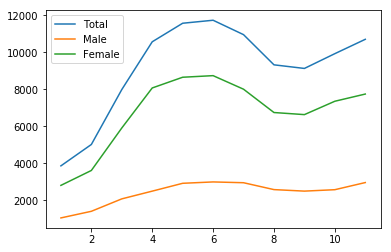

In [15]:
table_sex_1.plot()
plt.show()

#### Vamos a eleminar la columna tabla para solo ver los resultados de hombre y mujer

In [16]:
table_sex_1_except_total = table_sex_1.drop("Total",1)
table_sex_1_except_total


,Year,Male,Female
1,2006/07,1047.0,2807.0
2,2007/08,1405.0,3613.0
3,2008/09,2077.0,5910.0
4,2009/10,2495.0,8074.0
5,2010/11,2919.0,8654.0
6,2011/12,2993.0,8740.0
7,2012/13,2950.0,8007.0
8,2013/14,2578.0,6746.0
9,2014/15,2496.0,6633.0
10,2015/16,2573.0,7356.0


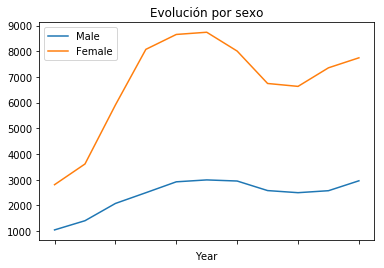

In [17]:
table_sex_1_except_total.plot(x="Year", title="Evolución por sexo")
plt.show()


### Casos entre 2006-2017 de diagnostico primario por edad

In [18]:
age_1 = pd.read_excel(dataset, sheet_name = 2 , skiprows=7 , skip_footer=14)
age_1.head(12)

,"Year4,5",Unnamed: 1,All ages6,Under 16,16 to 24,25 to 34,35 to 44,45 to 54,55 to 64,65 to 74,75 and over
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2006/07,NaN,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
2,2007/08,NaN,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
3,2008/09,NaN,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
4,2009/10,NaN,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
5,2010/11,NaN,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0
6,2011/12,NaN,11736.0,495.0,391.0,1484.0,3104.0,3581.0,2119.0,468.0,94.0
7,2012/13,NaN,10957.0,556.0,356.0,1437.0,2744.0,3305.0,1965.0,495.0,99.0
8,2013/14,NaN,9325.0,548.0,352.0,1209.0,2133.0,2839.0,1663.0,458.0,123.0
9,2014/15,NaN,9130.0,550.0,353.0,1201.0,1960.0,2759.0,1596.0,548.0,163.0


In [19]:
age_total_1 = age_1.rename(columns={"Year4,5":"Year", "All ages6":"Total"})
age_total_1.head()

,Year,Unnamed: 1,Total,Under 16,16 to 24,25 to 34,35 to 44,45 to 54,55 to 64,65 to 74,75 and over
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2006/07,NaN,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
2,2007/08,NaN,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
3,2008/09,NaN,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
4,2009/10,NaN,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0


In [20]:
table_age_1 = age_total_1.drop('Unnamed: 1', 1).dropna()
table_age_1.head(11)

,Year,Total,Under 16,16 to 24,25 to 34,35 to 44,45 to 54,55 to 64,65 to 74,75 and over
1,2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
2,2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
3,2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
4,2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
5,2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0
6,2011/12,11736.0,495.0,391.0,1484.0,3104.0,3581.0,2119.0,468.0,94.0
7,2012/13,10957.0,556.0,356.0,1437.0,2744.0,3305.0,1965.0,495.0,99.0
8,2013/14,9325.0,548.0,352.0,1209.0,2133.0,2839.0,1663.0,458.0,123.0
9,2014/15,9130.0,550.0,353.0,1201.0,1960.0,2759.0,1596.0,548.0,163.0
10,2015/16,9929.0,597.0,372.0,1265.0,2148.0,2948.0,1790.0,638.0,171.0


### Representacion grafica dediagnosticos primarios por tramos de edad

In [21]:
table_age_1_except_total = table_age_1.drop("Total",1)
table_age_1_except_total

,Year,Under 16,16 to 24,25 to 34,35 to 44,45 to 54,55 to 64,65 to 74,75 and over
1,2006/07,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
2,2007/08,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
3,2008/09,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
4,2009/10,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
5,2010/11,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0
6,2011/12,495.0,391.0,1484.0,3104.0,3581.0,2119.0,468.0,94.0
7,2012/13,556.0,356.0,1437.0,2744.0,3305.0,1965.0,495.0,99.0
8,2013/14,548.0,352.0,1209.0,2133.0,2839.0,1663.0,458.0,123.0
9,2014/15,550.0,353.0,1201.0,1960.0,2759.0,1596.0,548.0,163.0
10,2015/16,597.0,372.0,1265.0,2148.0,2948.0,1790.0,638.0,171.0


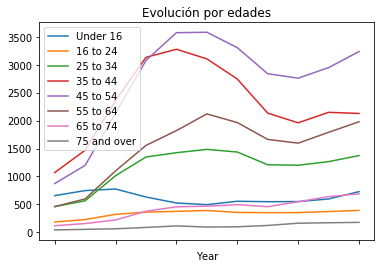

In [22]:
table_age_1_except_total.plot(x="Year", title="Evolución por edades")
plt.show()

### Casos entre 2006-2017 de diagnostico primario y secundario por sexos

In [23]:
sex_1_2 = pd.read_excel(dataset, sheet_name = 6 , skiprows=7 , skip_footer=14)
sex_1_2.head(12)



,Year4,Unnamed: 1,All persons5,Male,Female
0,NaN,NaN,NaN,NaN,NaN
1,2006/07,NaN,67211.0,27791.0,39411.0
2,2007/08,NaN,80914.0,32080.0,48829.0
3,2008/09,NaN,102987.0,39524.0,63457.0
4,2009/10,NaN,142219.0,52517.0,89657.0
5,2010/11,NaN,211783.0,75190.0,136566.0
6,2011/12,NaN,266666.0,92828.0,173803.0
7,2012/13,NaN,292404.0,99579.0,192795.0
8,2013/14,NaN,365577.0,123423.0,242118.0
9,2014/15,NaN,440288.0,149490.0,290747.0


In [24]:
sex_total_1_2 = sex_1_2.rename(columns={"Year4":"Year", "All persons5":"Total"})
sex_total_1_2.head()



,Year,Unnamed: 1,Total,Male,Female
0,NaN,NaN,NaN,NaN,NaN
1,2006/07,NaN,67211.0,27791.0,39411.0
2,2007/08,NaN,80914.0,32080.0,48829.0
3,2008/09,NaN,102987.0,39524.0,63457.0
4,2009/10,NaN,142219.0,52517.0,89657.0


In [25]:
table_sex_1_2 = sex_total_1_2.drop('Unnamed: 1', 1).dropna()
table_sex_1_2.head(11)

,Year,Total,Male,Female
1,2006/07,67211.0,27791.0,39411.0
2,2007/08,80914.0,32080.0,48829.0
3,2008/09,102987.0,39524.0,63457.0
4,2009/10,142219.0,52517.0,89657.0
5,2010/11,211783.0,75190.0,136566.0
6,2011/12,266666.0,92828.0,173803.0
7,2012/13,292404.0,99579.0,192795.0
8,2013/14,365577.0,123423.0,242118.0
9,2014/15,440288.0,149490.0,290747.0
10,2015/16,524725.0,175401.0,349279.0


### Representacion grafica dediagnosticos primarios y secundario por sexo

In [26]:
table_sex_1_2_except_total = table_sex_1.drop("Total",1)
table_sex_1_2_except_total



,Year,Male,Female
1,2006/07,1047.0,2807.0
2,2007/08,1405.0,3613.0
3,2008/09,2077.0,5910.0
4,2009/10,2495.0,8074.0
5,2010/11,2919.0,8654.0
6,2011/12,2993.0,8740.0
7,2012/13,2950.0,8007.0
8,2013/14,2578.0,6746.0
9,2014/15,2496.0,6633.0
10,2015/16,2573.0,7356.0


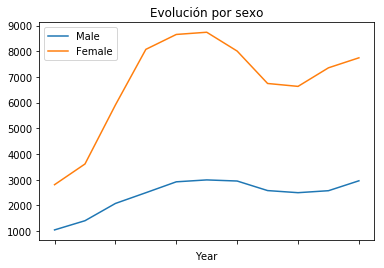

In [27]:
table_sex_1_2_except_total.plot(x="Year", title="Evolución por sexo")
plt.show()

### Casos entre 2006-2017 de diagnostico primario y secundario por edad

In [28]:
age_1_2 = pd.read_excel(dataset, sheet_name = 7 , skiprows=7 , skip_footer=14)
age_1_2.head(12)

,Year4,Unnamed: 1,All ages5,Under 16,16 to 24,25 to 34,35 to 44,45 to 54,55 to 64,65 to 74,75 and over
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2006/07,NaN,67211.0,1896.0,2316.0,5319.0,9961.0,12922.0,15882.0,12571.0,6296.0
2,2007/08,NaN,80914.0,2104.0,3169.0,7218.0,12101.0,15683.0,18489.0,14496.0,7512.0
3,2008/09,NaN,102987.0,2229.0,4326.0,9899.0,15508.0,19971.0,23136.0,18234.0,9531.0
4,2009/10,NaN,142219.0,2400.0,6609.0,15490.0,21344.0,27641.0,30884.0,24294.0,13399.0
5,2010/11,NaN,211783.0,2762.0,12042.0,26965.0,30606.0,39258.0,43754.0,36056.0,20056.0
6,2011/12,NaN,266666.0,2824.0,16016.0,37060.0,37098.0,47514.0,53209.0,45949.0,26989.0
7,2012/13,NaN,292404.0,3115.0,18849.0,43681.0,39627.0,51364.0,55676.0,50262.0,29822.0
8,2013/14,NaN,365577.0,3011.0,23743.0,59059.0,47629.0,61823.0,68175.0,63735.0,38393.0
9,2014/15,NaN,440288.0,3357.0,28321.0,71483.0,56598.0,73281.0,80400.0,79101.0,47732.0


In [29]:
age_total_1_2 = age_1_2.rename(columns={"Year4":"Year", "All ages5":"Total"})
age_total_1_2.head()

,Year,Unnamed: 1,Total,Under 16,16 to 24,25 to 34,35 to 44,45 to 54,55 to 64,65 to 74,75 and over
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2006/07,NaN,67211.0,1896.0,2316.0,5319.0,9961.0,12922.0,15882.0,12571.0,6296.0
2,2007/08,NaN,80914.0,2104.0,3169.0,7218.0,12101.0,15683.0,18489.0,14496.0,7512.0
3,2008/09,NaN,102987.0,2229.0,4326.0,9899.0,15508.0,19971.0,23136.0,18234.0,9531.0
4,2009/10,NaN,142219.0,2400.0,6609.0,15490.0,21344.0,27641.0,30884.0,24294.0,13399.0


In [30]:
table_age_1_2 = age_total_1_2.drop('Unnamed: 1', 1).dropna()
table_age_1_2.head(11)

,Year,Total,Under 16,16 to 24,25 to 34,35 to 44,45 to 54,55 to 64,65 to 74,75 and over
1,2006/07,67211.0,1896.0,2316.0,5319.0,9961.0,12922.0,15882.0,12571.0,6296.0
2,2007/08,80914.0,2104.0,3169.0,7218.0,12101.0,15683.0,18489.0,14496.0,7512.0
3,2008/09,102987.0,2229.0,4326.0,9899.0,15508.0,19971.0,23136.0,18234.0,9531.0
4,2009/10,142219.0,2400.0,6609.0,15490.0,21344.0,27641.0,30884.0,24294.0,13399.0
5,2010/11,211783.0,2762.0,12042.0,26965.0,30606.0,39258.0,43754.0,36056.0,20056.0
6,2011/12,266666.0,2824.0,16016.0,37060.0,37098.0,47514.0,53209.0,45949.0,26989.0
7,2012/13,292404.0,3115.0,18849.0,43681.0,39627.0,51364.0,55676.0,50262.0,29822.0
8,2013/14,365577.0,3011.0,23743.0,59059.0,47629.0,61823.0,68175.0,63735.0,38393.0
9,2014/15,440288.0,3357.0,28321.0,71483.0,56598.0,73281.0,80400.0,79101.0,47732.0
10,2015/16,524725.0,3415.0,34845.0,90480.0,66056.0,84143.0,94628.0,94056.0,57081.0


### Representacion grafica dediagnosticos primarios por tramos de edad

In [31]:
table_age_1_2_except_total = table_age_1_2.drop("Total",1)
table_age_1_2_except_total

,Year,Under 16,16 to 24,25 to 34,35 to 44,45 to 54,55 to 64,65 to 74,75 and over
1,2006/07,1896.0,2316.0,5319.0,9961.0,12922.0,15882.0,12571.0,6296.0
2,2007/08,2104.0,3169.0,7218.0,12101.0,15683.0,18489.0,14496.0,7512.0
3,2008/09,2229.0,4326.0,9899.0,15508.0,19971.0,23136.0,18234.0,9531.0
4,2009/10,2400.0,6609.0,15490.0,21344.0,27641.0,30884.0,24294.0,13399.0
5,2010/11,2762.0,12042.0,26965.0,30606.0,39258.0,43754.0,36056.0,20056.0
6,2011/12,2824.0,16016.0,37060.0,37098.0,47514.0,53209.0,45949.0,26989.0
7,2012/13,3115.0,18849.0,43681.0,39627.0,51364.0,55676.0,50262.0,29822.0
8,2013/14,3011.0,23743.0,59059.0,47629.0,61823.0,68175.0,63735.0,38393.0
9,2014/15,3357.0,28321.0,71483.0,56598.0,73281.0,80400.0,79101.0,47732.0
10,2015/16,3415.0,34845.0,90480.0,66056.0,84143.0,94628.0,94056.0,57081.0


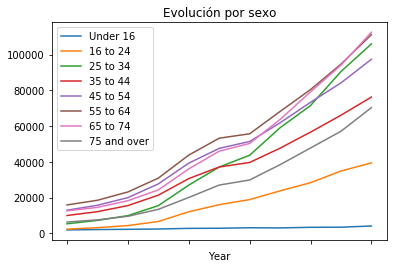

In [32]:
table_age_1_2_except_total.plot(x="Year", title="Evolución por sexo")
plt.show()

### Casos entre 2006-2017  con Cirugía Bariátrica por sexo

In [33]:
bs= pd.read_excel(dataset, sheet_name = 11 , skiprows=7 , skip_footer=14)
bs.head(12)

,OPCS procedure codes,Unnamed: 1,"Year6,7",All persons8,Male,Female,Unnamed: 6,"All persons (excluding gastric band maintenance)7,8"
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4.3,NaN,2006/07,1951.0,381.0,1562.0,NaN,NaN
2,4.4,NaN,2007/08,2724.0,598.0,2126.0,NaN,NaN
3,4.4,NaN,2008/09,4221.0,969.0,3251.0,NaN,NaN
4,4.5,NaN,2009/10,7214.0,1450.0,5762.0,NaN,5696.0
5,4.5,NaN,2010/11,8087.0,1771.0,6315.0,NaN,6643.0
6,4.6,NaN,2011/12,8794.0,2081.0,6711.0,NaN,7183.0
7,4.6,NaN,2012/136,8024.0,1944.0,6080.0,NaN,6961.0
8,4.6,NaN,2013/14,6384.0,1560.0,4823.0,NaN,6303.0
9,4.6,NaN,2014/15,6032.0,1444.0,4588.0,NaN,6011.0


In [34]:
bs_total = bs.rename(columns={"Year6,7":"Year", "All persons8":"Total"})
bs_total.head()

,OPCS procedure codes,Unnamed: 1,Year,Total,Male,Female,Unnamed: 6,"All persons (excluding gastric band maintenance)7,8"
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4.3,NaN,2006/07,1951.0,381.0,1562.0,NaN,NaN
2,4.4,NaN,2007/08,2724.0,598.0,2126.0,NaN,NaN
3,4.4,NaN,2008/09,4221.0,969.0,3251.0,NaN,NaN
4,4.5,NaN,2009/10,7214.0,1450.0,5762.0,NaN,5696.0


In [35]:
table_bs = bs_total.filter(items=["Year","Total","Male","Female"]).dropna()
table_bs.head(11)

,Year,Total,Male,Female
1,2006/07,1951.0,381.0,1562.0
2,2007/08,2724.0,598.0,2126.0
3,2008/09,4221.0,969.0,3251.0
4,2009/10,7214.0,1450.0,5762.0
5,2010/11,8087.0,1771.0,6315.0
6,2011/12,8794.0,2081.0,6711.0
7,2012/136,8024.0,1944.0,6080.0
8,2013/14,6384.0,1560.0,4823.0
9,2014/15,6032.0,1444.0,4588.0
10,2015/16,6438.0,1418.0,5020.0


### Casos entre 2006-2017  con Cirugía Bariátrica por edades

In [36]:
table_bs_except_total = table_bs.drop("Total",1)
table_bs_except_total

,Year,Male,Female
1,2006/07,381.0,1562.0
2,2007/08,598.0,2126.0
3,2008/09,969.0,3251.0
4,2009/10,1450.0,5762.0
5,2010/11,1771.0,6315.0
6,2011/12,2081.0,6711.0
7,2012/136,1944.0,6080.0
8,2013/14,1560.0,4823.0
9,2014/15,1444.0,4588.0
10,2015/16,1418.0,5020.0


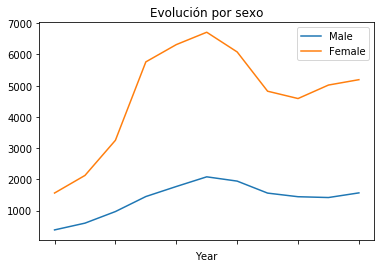

In [37]:
table_bs_except_total.plot(x="Year", title="Evolución por sexo")
plt.show()